Garcia, Gilberto

ASTR5900

HW3 - Numerical Integration

14 February 2024


____

# Question 1

Write your own code(s) to carry out a numerical integration using both the Euler Method and a Runge-Kutta Method (either 2nd order or 4th order).


## a

Use your code to solve the equation

$$ \frac{dy}{dx} = y^2 + 1 $$

and compare your answer with the exact solution $y = \tan(x)$. Also compare (and show
and comment on) your results for both the Euler and Runge-Kutta methods, using the same number of steps for each.

## b

At what value of x does your numerical solution start to break down, and how does that relate to the derivative of $y(x)$? Use a plot and/or table of numbers to show this breakdown.

## c
Show that a decrease in step size increases your accuracy. Do you notice a difference in how much the accuracy improves for the Euler method, versus the Runge-Kutta?

## d

In real problems, we usually perform a numerical integration on a function for which there is no known analytic solution. If you have no way to know the true/exact solution, you can still check your numerical result by running several cases with different step sizes. This is called a convergence study. If your solution is working, you should see the final solution asymptotically approaching some value, as the step-size decreases. If your solution is indeed converging, you can then use the differences in your last few cases (with the smallest step sizes) to estimate the uncertainty/precision of your final answer.

Pretend like you don't know the exact solution to the equation above. Do a convergence study, calculating the fractional difference between your highest-resolution (smallest step- size) case and a few other lower-resolution cases (make a range of step sizes over at least a factor of 10-100). Plot the fractional difference as a function of step size on a log-log scale. Show the Euler and Runge-Kutta methods on the same plot. The slope in this log- log plot is often referred to as the order of convergence. Comment on what you see.

## e

Now consider the exact/known solution. Does your smallest fractional difference, between your two highest-resolution cases, well-represent the actual difference between your best solution and the exact solution (i.e., is this a good measure of the uncertainty in your result)?

___

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1a

We first code our differential equation:

$$
\frac{dy}{dx} = y^2 + 1 = f(x,y)
$$

In [2]:
def dydx(x,y):
    return y**2 + 1

We now code our numerical integrators:

In [4]:
#we code the euler method first (a.k.a RK1):
def euler_integration(function,y0,x0,xf,num_of_steps):
    '''
    inputs:
        - function: the differential equation we want to solve
        - y0: the initial, known y value corresponding to the initial x value
        - x0: the left boundary of our integration
        - xf: the right boundary of our integration
        - num_of_steps: the number of steps we want to take between x0 and xf
    outputs:
        - x_lst: list of length equal to num_of_steps with x values at each iteration,
                    each value is evenly spaced by the step size
        - y_lst: list of length equal to num_of_steps with y values evaluted
                    using the euler step
    '''
    #we calculate the step size from the given boundary points and
    #num. of steps
    step_size = (xf - x0)/num_of_steps
    #we initialize our xi and yi to be the initial x and y given
    xi,yi = x0,y0
    #initialize the x and y list that we will write the values of each
    #iteration into
    x_lst,y_lst = [xi],[yi]
    #we will integrate up to our end boundary 
    for i in range(1,num_of_steps+1):
        increment = i * step_size
        #update the y value using the euler step
        y_next = yi + (step_size * function(xi,yi))
        #update the x value by adding on a step size
        x_next = x0 + increment
        xi = x_next
        yi = y_next
        #write the current x and y values into our lists
        x_lst += [xi]
        y_lst += [yi]
    return x_lst,y_lst

In [7]:
#we now code RK2 (Heun's Method):
def RK2(function,y0,x0,xf,num_of_steps):
    '''
    inputs:
        - function: the differential equation we want to solve
        - y0: the initial, known y value corresponding to the initial x value
        - x0: the left boundary of our integration
        - xf: the right boundary of our integration
        - num_of_steps: the number of steps we want to take between x0 and xf
    outputs:
        - x_lst: list of length equal to num_of_steps with x values at each iteration,
                    each value is evenly spaced by the step size
        - y_lst: list of length equal to num_of_steps with y values evaluted
                    using the RK2 step
    '''
    #we calculate the step size from the given boundary points and
    #num. of steps
    step_size = (xf - x0)/num_of_steps
    #we initialize our xi and yi to be the initial x and y given
    yi = y0
    xi = x0
    #initialize our stepper
    increment = 0.
    #initialize lists to write x and y values to:
    x_lst,y_lst = [x0],[y0]
    #we start our left bound and integrate up to our end boundary
    for i in range(1,num_of_steps+1):
        #we calculate the K1 and K2 values needed for the RK2 step
        k1 = function(xi,yi)
        k2 = function(xi,yi + k1*step_size)
        #we now increase our increment size
        increment = i*step_size
        #update our x value by adding the calculated increment
        x_next = x0 + increment
        #update our y value using the Rk2 step
        y_next = yi + (1/2)*(k1 + k2)*step_size
        yi = y_next
        xi = x_next
        #write the current x and y values into our lists
        x_lst += [xi]
        y_lst += [yi]
    return x_lst,y_lst

We now define a few parameters to plot the Euler and RK2 solutions against the exact solution.

In [10]:
#define our x boundaries:
xinitial,xfinal = 0,np.pi/2.04
#our 
yinitial = np.tan(xinitial)
num_of_steps = 100

tan_x_values = np.linspace(xinitial,xfinal,num_of_steps)
tan_y_values = np.tan(tan_x_values)

x_lst_rk2,y_lst_rk2 = RK2(dydx,yinitial,xinitial,xfinal,num_of_steps)
x_lst_euler,y_lst_euler = euler_integration(dydx,yinitial,xinitial,xfinal,num_of_steps)

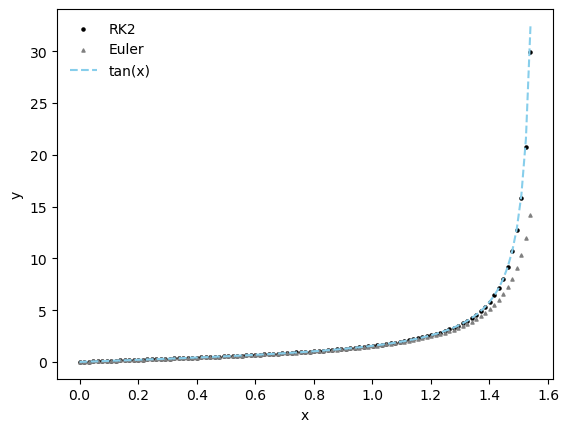

In [11]:
plt.scatter(x_lst_rk2,y_lst_rk2,s=5,color='black',label='RK2')
plt.scatter(x_lst_euler,y_lst_euler,s=5,color='gray',marker='^',label='Euler')
plt.plot(tan_x_values,tan_y_values,linestyle='--',color='skyblue',label='tan(x)')
plt.legend(frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The figure above shows the exact solution to the differential equation, along with the solution obtained from the Euler and Rk2 integrators. We used 100 steps on a range of 0 to $\frac{\pi}{2.04}$. As we approach our right bound, it is clear that the Euler integrator begins to diverge from the exact solution. Meanwhile, the RK2 method is matching up with the exact solution much better in this range.

## 1b

The boundary for the plot above was strictly chosen so that the divergent points of tan(x) aren't reached. Specifically, tan(x) approaches infinity as $x$ approaches $\frac{\pi}{2}$ from the left, which creates issues for our integrators.

To see this better, we can look at the derivative of tan(x) since the Euler and RK2 methods rely on the derivative of the solution to calculate the slope between successive points. The derivative of tan(x) is sec$^2(x)$. Let's plot it:

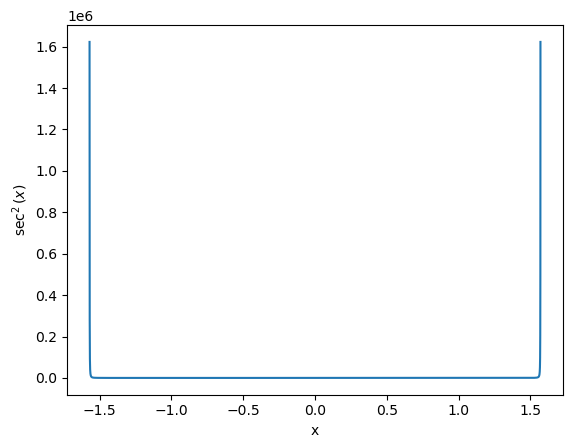

In [12]:
sec_x_values = np.linspace(-np.pi/2.001,np.pi/2.001,100_000)
sec_y_values = 1/(np.cos(sec_x_values))
plt.plot(sec_x_values,sec_y_values**2)
plt.ylabel(r'$\sec^2(x)$')
plt.xlabel('x')
plt.show()

We see that sec$^2(x)$ is growing rapidly at the boundaries of $\pm \frac{\pi}{2}$. This hints at the fact that we will have problems in our integrators at these values. Let's test it:

In [13]:
xinitial_1b,xfinal_1b = 0,np.pi/2.1
yinitial_1b = np.tan(xinitial_1b)
num_of_steps = 100

tan_x_values_1b = np.linspace(xinitial_1b,xfinal_1b,1_000)
tan_y_values_1b = np.tan(tan_x_values_1b)

x_lst_rk2_1b,y_lst_rk2_1b = RK2(dydx,yinitial_1b,xinitial_1b,xfinal_1b,num_of_steps)
x_lst_euler_1b,y_lst_euler_1b = euler_integration(dydx,yinitial_1b,xinitial_1b,xfinal_1b,num_of_steps)

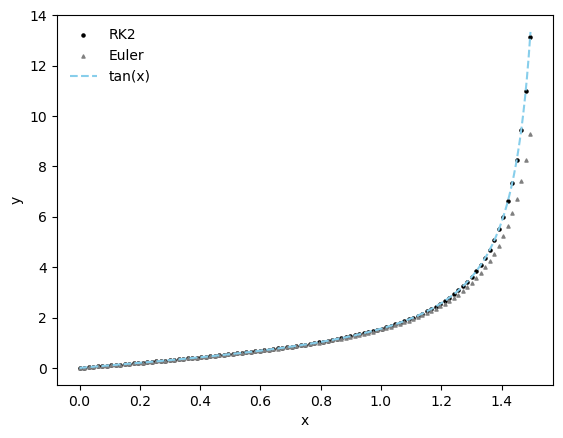

In [14]:
plt.scatter(x_lst_rk2_1b,y_lst_rk2_1b,s=5,color='black',label='RK2')
plt.scatter(x_lst_euler_1b,y_lst_euler_1b,s=5,color='gray',marker='^',label='Euler')
plt.plot(tan_x_values_1b,tan_y_values_1b,linestyle='--',color='skyblue',label='tan(x)')
plt.legend(frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

tan(x) increases at a rate too rapidly for our integrators too keep up. For each step in x, the step in y gets much larger.

## 1c

To show how the step size influences the accurary, let's plot similar plots to those above but a various step sizes:

In [15]:
xinitial_1c,xfinal_1c = 0,np.pi/2.2
yinitial_1c = np.tan(xinitial_1c)
xinitial_1c,xfinal_1c = 0,np.pi/2.01
tan_x_values_1c = np.linspace(xinitial_1c,xfinal_1c,10_000)
tan_y_values_1c = np.tan(tan_x_values_1c)

In [16]:
#steps: 10
steps1 = 5
x_lst_rk2_5,y_lst_rk2_5 = RK2(dydx,yinitial,xinitial,xfinal,steps1)
x_lst_euler_5,y_lst_euler_5 = euler_integration(dydx,yinitial,xinitial,xfinal,steps1)

#steps: 50
steps2 = 10
x_lst_rk2_10,y_lst_rk2_10 = RK2(dydx,yinitial,xinitial,xfinal,steps2)
x_lst_euler_10,y_lst_euler_10 = euler_integration(dydx,yinitial,xinitial,xfinal,steps2)


#steps: 100
steps3 = 100
x_lst_rk2_100,y_lst_rk2_100 = RK2(dydx,yinitial,xinitial,xfinal,steps3)
x_lst_euler_100,y_lst_euler_100 = euler_integration(dydx,yinitial,xinitial,xfinal,steps3)


#steps: 1000
steps4 = 1_000
x_lst_rk2_1000,y_lst_rk2_1000 = RK2(dydx,yinitial,xinitial,xfinal,steps4)
x_lst_euler_1000,y_lst_euler_1000 = euler_integration(dydx,yinitial,xinitial,xfinal,steps4)


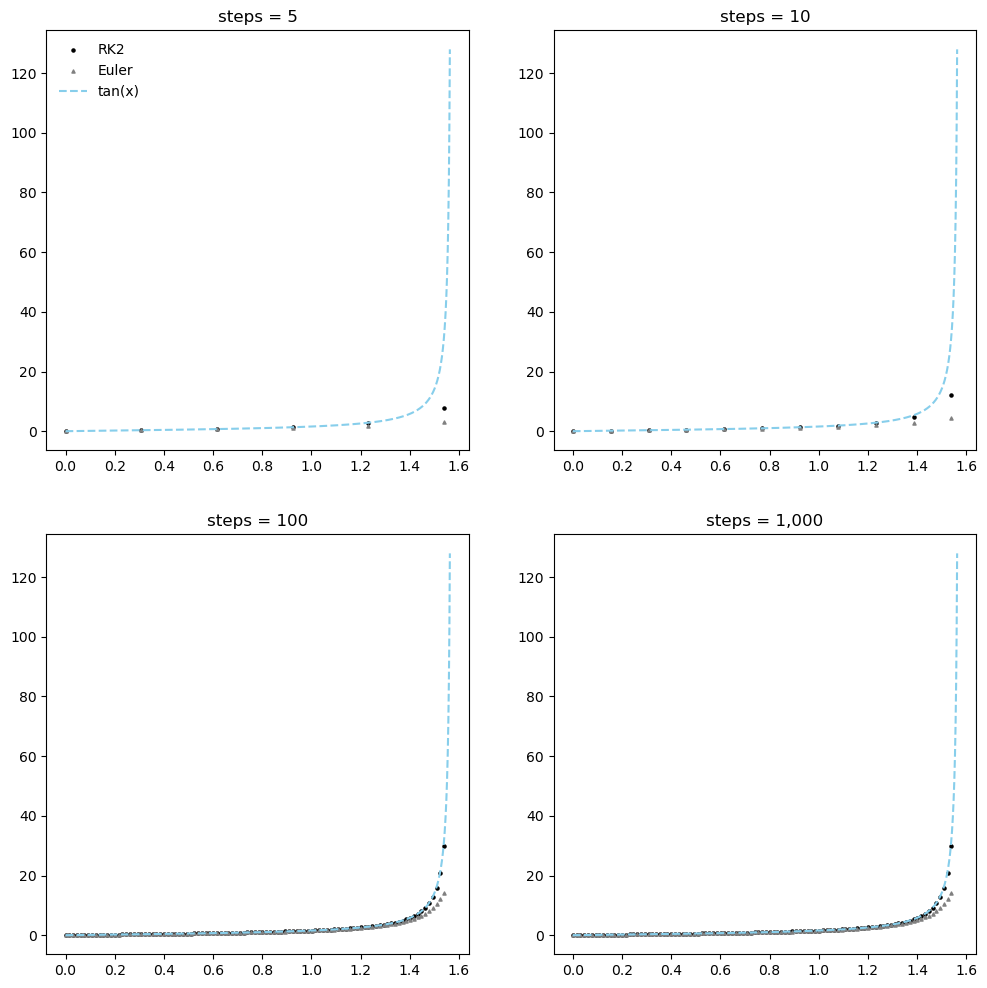

In [17]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
#fig.suptitle('increasing step size')
axs[0,0].scatter(x_lst_rk2_5,y_lst_rk2_5,s=5,color='black',label='RK2')
axs[0,0].scatter(x_lst_euler_5,y_lst_euler_5,s=5,color='gray',marker='^',label='Euler')
axs[0,0].plot(tan_x_values_1c,tan_y_values_1c,linestyle='--',color='skyblue',label='tan(x)')
axs[0,0].set_title('steps = 5')
axs[0,0].legend(frameon=False)

axs[0,1].scatter(x_lst_rk2_10,y_lst_rk2_10,s=5,color='black',label='RK2')
axs[0,1].scatter(x_lst_euler_10,y_lst_euler_10,s=5,color='gray',marker='^',label='Euler')
axs[0,1].plot(tan_x_values_1c,tan_y_values_1c,linestyle='--',color='skyblue',label='tan(x)')
axs[0,1].set_title('steps = 10')

axs[1,0].scatter(x_lst_rk2_100,y_lst_rk2_100,s=5,color='black',label='RK2')
axs[1,0].scatter(x_lst_euler_100,y_lst_euler_100,s=5,color='gray',marker='^',label='Euler')
axs[1,0].plot(tan_x_values_1c,tan_y_values_1c,linestyle='--',color='skyblue',label='tan(x)')
axs[1,0].set_title('steps = 100')

axs[1,1].scatter(x_lst_rk2_100,y_lst_rk2_100,s=5,color='black',label='RK2')
axs[1,1].scatter(x_lst_euler_100,y_lst_euler_100,s=5,color='gray',marker='^',label='Euler')
axs[1,1].plot(tan_x_values_1c,tan_y_values_1c,linestyle='--',color='skyblue',label='tan(x)')
axs[1,1].set_title('steps = 1,000')

plt.show()


Clearly, the accuracy of our integrators increases with more steps within the interval/decreasing step size. However, while RK2's accuracy increases rapidly (even from 5 steps to 10 steps), Euler's accuracy stagnates and never matches the exact solution (notice the similarities between 100 and 1,000 steps in the Euler curve).

## 1d

We want to plot the value at some right boundary as a function of step size. We choose the right boundary to be $\frac{\pi}{2.1}$.

In [18]:
print('the x value we will approach: ',np.pi/2.1)
print('the y value we will approach: ',np.tan(np.pi/2.1))

the x value we will approach:  1.4959965017094252
the y value we will approach:  13.344072639597687


In [19]:
#we initialize our initial and final x values and our initial y value
xinitial_1d,xfinal_1d = 0,np.pi/2.1
yinitial_1d = np.tan(xinitial_1d)

In [42]:
#we define an array of number of steps from 10^(3) to 10^(6)
num_of_steps_arr = [round(value) for value in np.logspace(1,6,50)]

#initialize a few lists to which we will append values into
step_size = []
euler_answer,rk2_answer = [],[]
rk2_xlst,e_xlst = [],[]
#now we will run RK2 and the Euler integrators 
#for each value in our number of steps array
for steps in num_of_steps_arr:
    #compute the step size 
    step_size += [(xfinal_1d - xinitial_1d)/steps]
    #run rk2 and euler for this step size
    rk2_xlst_1d,rk2_ylst_1d = RK2(dydx,yinitial_1d,xinitial_1d,xfinal_1d,steps)
    euler_xlst_1d,euler_ylst_1d = euler_integration(dydx,yinitial_1d,xinitial_1d,xfinal_1d,steps)
    #apend the final x and y value of the integration
    e_xlst += [euler_xlst_1d[-1]]
    rk2_xlst += [rk2_xlst_1d[-1]]
    euler_answer += [euler_ylst_1d[-1]]
    rk2_answer += [rk2_ylst_1d[-1]]

In [43]:
print('the number of steps for each run is:')
print('\t'.join(['{:.5e}'.format(x) for x in num_of_steps_arr]))
print()
print('the step size for each run is:')
print('\t'.join(['{:.5e}'.format(x) for x in step_size]))

the number of steps for each run is:
1.00000e+01	1.30000e+01	1.60000e+01	2.00000e+01	2.60000e+01	3.20000e+01	4.10000e+01	5.20000e+01	6.60000e+01	8.30000e+01	1.05000e+02	1.33000e+02	1.68000e+02	2.12000e+02	2.68000e+02	3.39000e+02	4.29000e+02	5.43000e+02	6.87000e+02	8.69000e+02	1.09900e+03	1.38900e+03	1.75800e+03	2.22300e+03	2.81200e+03	3.55600e+03	4.49800e+03	5.69000e+03	7.19700e+03	9.10300e+03	1.15140e+04	1.45630e+04	1.84210e+04	2.33000e+04	2.94710e+04	3.72760e+04	4.71490e+04	5.96360e+04	7.54310e+04	9.54100e+04	1.20679e+05	1.52642e+05	1.93070e+05	2.44205e+05	3.08884e+05	3.90694e+05	4.94171e+05	6.25055e+05	7.90604e+05	1.00000e+06

the step size for each run is:
1.49600e-01	1.15077e-01	9.34998e-02	7.47998e-02	5.75383e-02	4.67499e-02	3.64877e-02	2.87692e-02	2.26666e-02	1.80241e-02	1.42476e-02	1.12481e-02	8.90474e-03	7.05659e-03	5.58208e-03	4.41297e-03	3.48717e-03	2.75506e-03	2.17758e-03	1.72151e-03	1.36123e-03	1.07703e-03	8.50965e-04	6.72963e-04	5.32004e-04	4.20696e-04	3.32591e-04	2.62917

Let's visualize our results now. We will plot the result of the integration as a function of step size. We expect that our answers approach the exact value (tan($\frac{\pi}{2.1}) \approx 13.34)$ as we decrease our step size (take more steps).

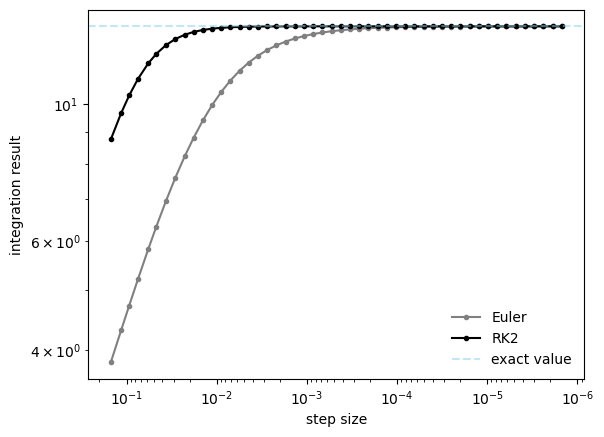

In [44]:
#lets visuallize our results:
plt.loglog(step_size,euler_answer,color='gray',label='Euler',marker='.')
plt.loglog(step_size,rk2_answer,color='black',label='RK2',marker='.')
plt.axhline(np.tan(np.pi/2.1),color='skyblue',linestyle='--',alpha=0.5,label='exact value')
plt.legend(frameon=False)
plt.ylabel('integration result')
plt.xlabel('step size')
plt.gca().invert_xaxis()
plt.show()

In [45]:
print('the final Euler value for each run is:')
print('\t'.join(['{:.5e}'.format(x) for x in euler_answer]))
print()
print('the final RK2 value for each run is:')
print('\t'.join(['{:.5e}'.format(x) for x in rk2_answer]))
print()
euler_diff = abs(euler_answer[-2] - euler_answer[-1])
print('The final two values of the Euler Integration differ by {:e}'.format(euler_diff))
rk2_diff = abs(rk2_answer[-2] - rk2_answer[-1])
print('The final two values of the RK2 Integration differ by {:e}'.format(rk2_diff))

the final Euler value for each run is:
3.81460e+00	4.29554e+00	4.71391e+00	5.19940e+00	5.81362e+00	6.32789e+00	6.96573e+00	7.59127e+00	8.21976e+00	8.81256e+00	9.39699e+00	9.94936e+00	1.04520e+01	1.09039e+01	1.13076e+01	1.16599e+01	1.19624e+01	1.22182e+01	1.24315e+01	1.26077e+01	1.27521e+01	1.28694e+01	1.29650e+01	1.30417e+01	1.31034e+01	1.31527e+01	1.31921e+01	1.32235e+01	1.32485e+01	1.32684e+01	1.32841e+01	1.32966e+01	1.33065e+01	1.33143e+01	1.33206e+01	1.33255e+01	1.33294e+01	1.33324e+01	1.33349e+01	1.33368e+01	1.33383e+01	1.33395e+01	1.33405e+01	1.33412e+01	1.33418e+01	1.33423e+01	1.33427e+01	1.33430e+01	1.33432e+01	1.33434e+01

the final RK2 value for each run is:
8.75396e+00	9.64921e+00	1.03166e+01	1.09678e+01	1.16223e+01	1.20461e+01	1.24445e+01	1.27277e+01	1.29315e+01	1.30683e+01	1.31641e+01	1.32282e+01	1.32696e+01	1.32965e+01	1.33139e+01	1.33250e+01	1.33321e+01	1.33365e+01	1.33393e+01	1.33411e+01	1.33422e+01	1.33429e+01	1.33433e+01	1.33436e+01	1.33438e+01	1.33439e+01	1.33440e+01

Now let's look at the fractional difference between successive points:

In [46]:
frac_diff_euler = []
frac_diff_rk2 = []
for i in range(1,len(num_of_steps_arr)):
    frac_diff_euler += [abs(euler_answer[i] - euler_answer[i-1])/euler_answer[i-1]]
    frac_diff_rk2 += [abs(rk2_answer[i] - rk2_answer[i-1])/rk2_answer[i-1]]
    

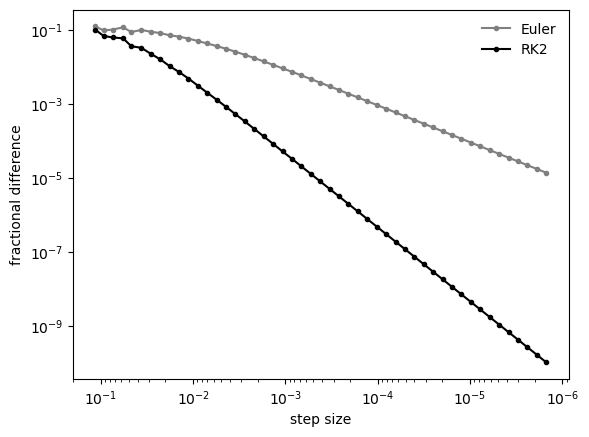

In [47]:
#lets visuallize our results:
plt.loglog(step_size[1:],frac_diff_euler,color='gray',label='Euler',marker='.')
plt.loglog(step_size[1:],frac_diff_rk2,color='black',label='RK2',marker='.')
#plt.axhline(np.tan(np.pi/2.1),color='skyblue',linestyle='--',alpha=0.5,label='exact value')
plt.legend(frameon=False)
plt.ylabel('fractional difference')
plt.xlabel('step size')
plt.gca().invert_xaxis()
plt.show()

In [48]:
print('the fractional difference between successive points in Euler integration is:')
print('\t'.join(['{:.5e}'.format(x) for x in frac_diff_euler]))
print()
print('the fractional difference between successive points in RK2 integration is:')
print('\t'.join(['{:.5e}'.format(x) for x in frac_diff_rk2]))

the fractional difference between successive points in Euler integration is:
1.26077e-01	9.73979e-02	1.02990e-01	1.18133e-01	8.84597e-02	1.00798e-01	8.98019e-02	8.27911e-02	7.21199e-02	6.63171e-02	5.87824e-02	5.05160e-02	4.32432e-02	3.70174e-02	3.11581e-02	2.59415e-02	2.13854e-02	1.74545e-02	1.41741e-02	1.14532e-02	9.20097e-03	7.42738e-03	5.91761e-03	4.73051e-03	3.76366e-03	2.99700e-03	2.38140e-03	1.88878e-03	1.49769e-03	1.18702e-03	9.40092e-04	7.44624e-04	5.89271e-04	4.66299e-04	3.68919e-04	2.91866e-04	2.30842e-04	1.82582e-04	1.44395e-04	1.14179e-04	9.02909e-05	7.13933e-05	5.64498e-05	4.46340e-05	3.52905e-05	2.79021e-05	2.20606e-05	1.74418e-05	1.37900e-05

the fractional difference between successive points in RK2 integration is:
1.02268e-01	6.91616e-02	6.31301e-02	5.96701e-02	3.64632e-02	3.30717e-02	2.27616e-02	1.60087e-02	1.05781e-02	7.33276e-03	4.86606e-03	3.13515e-03	2.02184e-03	1.30863e-03	8.35896e-04	5.30648e-04	3.35180e-04	2.10662e-04	1.32356e-04	8.30778e-05	5.20340e-05	3.28265

Generally our assumption that as step size decreases (to the right in our figure above), the integration results approaches the exact value holds true. The final few values of the RK2 integration all differ by less than 10$^{-8}$ while the final two values of the Euler integration differ by less than 10$^{-3}$, giving us a handle of the uncertainty of the integration.

However, the graphs aren't monotonic and there are a few values that go away from the exact solution. This seems to be an artifact of the code rather than the true nature of RK2 or Euler integration. To this this hypothesis, let's plot the (x,y) coordinates of the solution for each step size.

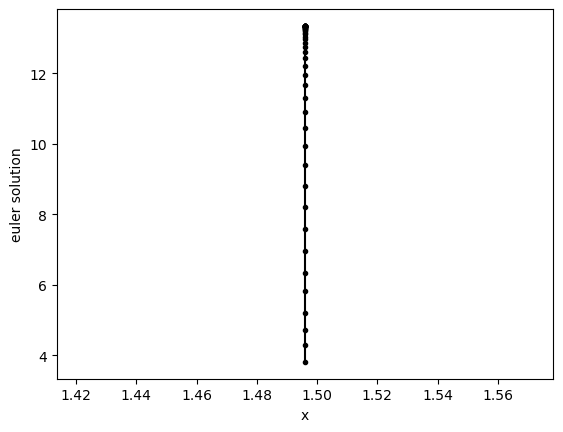

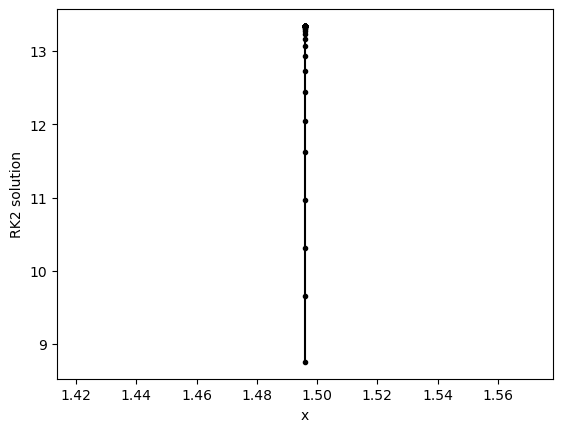

In [49]:
#plot the x,y coords for Euler as a fxn of step size
plt.plot(e_xlst,euler_answer,marker = '.',color ='black')
#plt.axvline(np.pi/2.1,color='gray',linestyle='--',alpha= 0.5)
plt.ylabel('euler solution')
plt.xlabel('x')
plt.show()
#the same plot for RK2
plt.plot(rk2_xlst,rk2_answer,marker = '.',color = 'black')
#plt.axvline(np.pi/2.1,color='gray',linestyle='--',alpha= 0.5)
plt.ylabel('RK2 solution')
plt.xlabel('x')
plt.show()

With a more precise code, the final x value of all runs, regardless of step size, should be at exactly $\pi/2.1 \approx 1.4959 $. However, we see that there is some variance, especially for the bigger step sizes. Specifically, the x values in the Euler integration bounce around quite a bit, in similar fashion to how the convergence plot bounces around. Thus, the behavior of the convergence plot can be attributed to a bug in the way I coded the algorithm. This causes the algorithms to stop at different x values each time depending on the step size rather than stopping at the given final x value.

I tried a few things for debugging this issue but couldn't figure it out.

## 1e

In [50]:
print('The fractional difference between the two highest resolution cases is\n')
print('for Euler:\t {:.5e}'.format(frac_diff_euler[-1]))
print('for RK2:\t {:.5e}'.format(frac_diff_rk2[-1]))
print()
print('The best solution obtained at a step size of {:.4e} is:\n'.format(step_size[-1]))
print('for Euler:\t {:e}'.format(euler_answer[-1]))
print('for RK2:\t {:e}'.format(rk2_answer[-1]))
print()
print('The difference between the best solution and the exact answer of tan(pi/2.1)={:.5f} is:\n'.format(np.tan(np.pi/2.1)))
print('for Euler:\t {:e}'.format(abs(euler_answer[-1]-np.tan(np.pi/2.1))))
print('for RK2:\t {:e}'.format(abs(rk2_answer[-1]-np.tan(np.pi/2.1))))

The fractional difference between the two highest resolution cases is

for Euler:	 1.37900e-05
for RK2:	 1.02011e-10

The best solution obtained at a step size of 1.4960e-06 is:

for Euler:	 1.334338e+01
for RK2:	 1.334407e+01

The difference between the best solution and the exact answer of tan(pi/2.1)=13.34407 is:

for Euler:	 6.947930e-04
for RK2:	 2.274174e-09


The fractional difference does result in a good approximation of the actual difference of the best solution and the exact answer. The fractional difference is smaller by one order of magnitude to the actual difference for both cases.